In [1]:
!qstat -u medirz90


o0004.ten.osc.edu:
                                                                               Req'd  Req'd   Elap 
Job id               Username Queue    Name                 SessID NDS   TSK   Memory Time Use S Time 
-------------------- -------- -------- -------------------- ------ ----- ----- ------ ----- - -----
26916394             medirz90 serial   ondemand/sys/dashboa --         1     2     -- 02:00 R 00:05


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '/users/PHS0336/medirz90/github/LSSutils')
from lssutils.theory.cell import Spectrum, init_sample
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.integrate import quad
import numpy as np
import nbodykit.cosmology as cosmology

In [4]:
z, b, dNdz = init_sample('lrg')

lrg


In [17]:
sp = Spectrum()
sp.add_tracer(z, b, dNdz)

h         : 0.67556
T0_cmb    : 2.7255
Omega0_b  : 0.0482754208891869
Omega0_cdm: 0.26377065934278865
N_ur      : None
m_ncdm    : [0.06]
P_k_max   : 10.0
P_z_max   : 100.0
sigma8    : 0.8225
gauge     : synchronous
n_s       : 0.9667
nonlinear : False
p = 1.0
39.77485539251425


In [7]:
r = np.linspace(sp.Dc(0.01), sp.Dc(2.0), 1000)

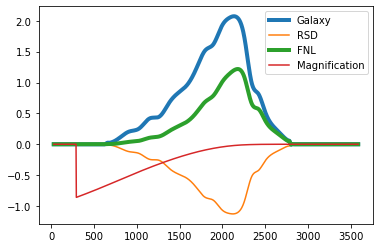

In [8]:
plt.plot(r, sp.fr_wk(r), lw=4, label='Galaxy')
plt.plot(r, sp.fr_wrk(r), label='RSD')
plt.plot(r, sp.fr_wkfnl1(r)+sp.fr_wkfnl2(r), lw=4, label='FNL')
plt.plot(r, sp.fr_wkmag(r), label='Magnification')
plt.legend()

In [18]:
cl_old = np.loadtxt('/users/PHS0336/medirz90/github/flask/data/desiClzero-f1z1f1z1.dat').T
cl_old.shape

(2, 2000)

In [19]:
sp.add_kernels(cl_old[0, :])

/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:316: RuntimeWarning: divide by zero encountered in true_divide
  fnl_f = self.alpha_fnl/(k2*self.Tlin(k))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:338: RuntimeWarning: invalid value encountered in multiply
  i_mf1.append(self.simps(k3pk*w_m*w_f1, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:339: RuntimeWarning: invalid value encountered in multiply
  i_mf2.append(self.simps(k3pk*w_m*w_f2, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:317: RuntimeWarning: invalid value encountered in multiply
  w_f1 = self.wfnlk1[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:318: RuntimeWarning: invalid value encountered in multiply
  w_f2 = self.wfnlk2[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:327: RuntimeWarning: invalid value encountered in multiply
  i_f1f1.append(self.simps(k3pk*w_f1*w_f1, lnk))
/users

In [20]:
cl_new = sp(cl_old[0, :], fnl=0, b=1.4262343145500318)

In [40]:
from lssutils.dataviz import setup_color

In [41]:
setup_color()

Text(0.5, 1.0, 'relative impact')

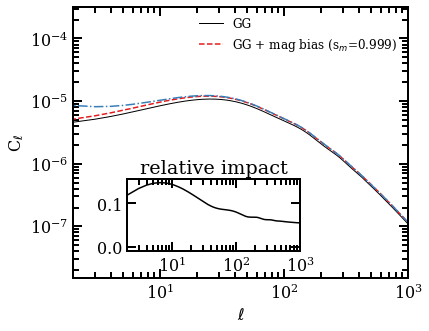

In [48]:
plt.figure(figsize=(6, 5))
plt.loglog(cl_old[1], '-', lw=1, label='GG')
plt.loglog(cl_new, '--', label='GG + mag bias (s$_{m}$=0.999)')

plt.xlim(2, 1000.)
plt.legend()
plt.ylabel(r'C$_{\ell}$')
plt.xlabel(r'$\ell$')

plt.axes([0.25, 0.2, 0.4, 0.2])
plt.semilogx(cl_new/cl_old[1]-1, '-')
plt.xlim(2, 1000.)
plt.ylim()
plt.title('relative impact')

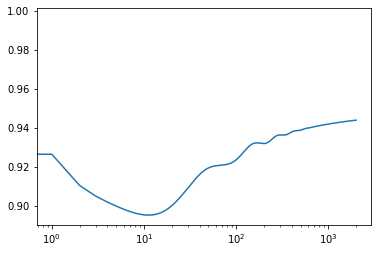

In [16]:
plt.semilogx(cl_new/cl_old[1])

In [32]:
(cl_old[1]-cl_new)

array([1.15367898e-08, 1.52322827e-08, 1.86334627e-08, ...,
       1.16023526e-10, 1.15889426e-10, 1.15755543e-10])

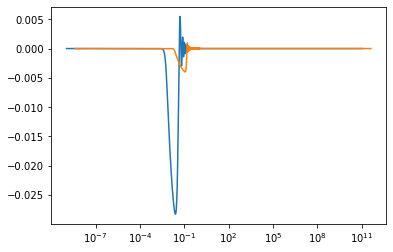

In [44]:
plt.semilogx(*sp.wmag[10])
plt.semilogx(*sp.wmag[40])

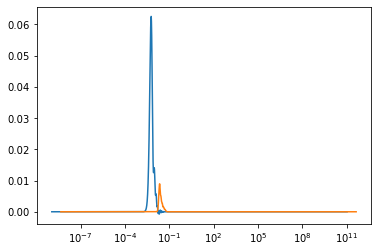

In [42]:
plt.semilogx(*sp.wk[10])
plt.semilogx(*sp.wk[44])

In [48]:
ell2p1 = sp.ell*(sp.ell+1)

In [51]:
sp.wmag[0][0]

array([1.00000000e-10, 1.00461625e-10, 1.00925382e-10, ...,
       9.90831032e+09, 9.95404959e+09, 1.00000000e+10])

In [53]:
sp.wk[0][1]

array([9.99999987e-01, 9.99999988e-01, 9.99999988e-01, ...,
       6.28029137e-21, 6.28029136e-21, 6.28029137e-21])

In [54]:
!qstat -u medirz90


o0004.ten.osc.edu:
                                                                               Req'd  Req'd   Elap 
Job id               Username Queue    Name                 SessID NDS   TSK   Memory Time Use S Time 
-------------------- -------- -------- -------------------- ------ ----- ----- ------ ----- - -----
26915986             medirz90 serial   ondemand/sys/dashboa --         1     2     -- 02:00 R 01:30


In [55]:
a = 2

In [56]:
-a

-2

In [57]:
a = np.arange(4)

In [58]:
a

array([0, 1, 2, 3])

In [59]:
-a

array([ 0, -1, -2, -3])